In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

df = pd.read_csv("C:/injection.csv",encoding='CP949')
print(df.head()) #head출력
print()
print('data shape = ',df.shape) #데이터 프레임 크기 (119895행, 14열)

#df.info() #데이터프레임정보

                    일시          도번  차수        작업지시번호  샷 아이디  PEAK압력  최소쿠션  \
0  1970-01-01 00:00:00  1031721900   0  2018020060-5      0     0.0   0.0   
1  1970-01-01 00:00:00  1031721900   0  2018020060-5   8514  1939.0  10.1   
2  2018-02-22 17:34:42  1031721300   0  2018020042-9   1199  1592.3  10.5   
3  2018-02-22 17:35:03  1031721300   0  2018020042-9   1200  1593.2  10.5   
4  2018-02-22 17:35:23  1031721300   0  2018020042-9   1201  1596.9  10.4   

   V-P위치   V-P압력  사출시간  계량시간  사이클타임  금형(상)  금형(하)  
0    0.0     0.0   0.0  0.00   0.00   16.5   16.8  
1   10.1  1899.9   2.5  1.59  17.90   16.3   17.1  
2   10.5  1550.5   2.0  1.60  20.54   16.1   16.8  
3   10.5  1549.9   2.0  1.59  20.52   16.0   16.8  
4   10.4  1550.5   2.0  1.59  20.54   16.0   16.8  

data shape =  (119895, 14)


In [78]:
df.columns #데이터프레임 열 이름 조회

Index(['일시', '도번', '차수', '작업지시번호', '샷 아이디', 'PEAK압력', '최소쿠션', 'V-P위치', 'V-P압력',
       '사출시간', '계량시간', '사이클타임', '금형(상)', '금형(하)'],
      dtype='object')

In [79]:
#데이터프레임 열 이름 바꾸기
df.rename(columns={'샷 아이디':'샷아이디'}, inplace = True)
df.rename(columns={'V-P위치':'VP위치'}, inplace = True)
df.rename(columns={'V-P압력':'VP압력'}, inplace = True)
df.rename(columns={'금형(상)':'금형상'}, inplace = True)
df.rename(columns={'금형(하)':'금형하'}, inplace = True)
df

,일시,도번,차수,작업지시번호,샷아이디,PEAK압력,최소쿠션,VP위치,VP압력,사출시간,계량시간,사이클타임,금형상,금형하
0,1970-01-01 00:00:00,1031721900,0,2018020060-5,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,16.5,16.8
1,1970-01-01 00:00:00,1031721900,0,2018020060-5,8514,1939.0,10.1,10.1,1899.9,2.5,1.59,17.90,16.3,17.1
2,2018-02-22 17:34:42,1031721300,0,2018020042-9,1199,1592.3,10.5,10.5,1550.5,2.0,1.60,20.54,16.1,16.8
3,2018-02-22 17:35:03,1031721300,0,2018020042-9,1200,1593.2,10.5,10.5,1549.9,2.0,1.59,20.52,16.0,16.8
4,2018-02-22 17:35:23,1031721300,0,2018020042-9,1201,1596.9,10.4,10.4,1550.5,2.0,1.59,20.54,16.0,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119890,2018-05-01 09:17:58,1031721900,0,2018040018-6,4123,1646.6,9.5,9.5,1600.7,1.6,1.81,17.74,25.1,26.3
119891,2018-05-01 09:18:16,1031721900,0,2018040018-6,4124,1646.0,9.5,9.5,1599.3,1.6,1.80,17.74,25.2,26.2
119892,2018-05-01 09:18:34,1031721900,0,2018040018-6,4125,1644.2,9.5,9.5,1598.8,1.6,1.81,17.76,25.2,26.3
119893,2018-05-01 09:18:51,1031721900,0,2018040018-6,4126,1643.0,9.5,9.5,1599.6,1.6,1.82,17.72,25.2,26.3


In [8]:
# 사분위 수로 이상치 제거하는 함수
def outlier_iqr(data, column):
    #lower, upper 글로벌 변수 선언
    global lower, upper
    
    #4분위수 기준 지정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    
    #IQR계산하기
    iqr = q75 - q25
    
    #outlier cutoff 계산하기
    cut_off = iqr * 1.5
    
    #lower와 upper bound값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off
    
    print("IQR = ", iqr)
    print("lower bound = ", lower)
    print("upper bound = ", upper)
    
    #1사분위와 4사분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]
    
    #이상치 총 개수
    return print('총 이상치 수는 ', data1.shape[0] + data2.shape[0],'입니다')

In [11]:
outlier_iqr(df,'PEAK압력')

IQR =  221.0
lower bound =  1411.0
upper bound =  2295.0
총 이상치 수는  4 입니다


In [16]:
outlier_iqr(df,'최소쿠션')

IQR =  1.299999999999999
lower bound =  7.850000000000002
upper bound =  13.049999999999997
총 이상치 수는  18 입니다


In [17]:
outlier_iqr(df,'VP위치')

IQR =  1.299999999999999
lower bound =  7.850000000000002
upper bound =  13.049999999999997
총 이상치 수는  18 입니다


In [19]:
outlier_iqr(df,'VP압력')

IQR =  199.5999999999999
lower bound =  1400.3000000000002
upper bound =  2198.7
총 이상치 수는  4 입니다


In [20]:
outlier_iqr(df, '사출시간')

IQR =  0.7
lower bound =  0.7500000000000002
upper bound =  3.55
총 이상치 수는  11 입니다


In [21]:
outlier_iqr(df,'계량시간')

IQR =  0.49
lower bound =  0.43499999999999994
upper bound =  2.395
총 이상치 수는  25 입니다


In [22]:
outlier_iqr(df,'사이클타임')

IQR =  0.29999999999999716
lower bound =  17.470000000000006
upper bound =  18.669999999999995
총 이상치 수는  28838 입니다


In [23]:
outlier_iqr(df,'금형상')

IQR =  3.5
lower bound =  14.75
upper bound =  28.75
총 이상치 수는  255 입니다


In [24]:
outlier_iqr(df,'금형하')

IQR =  80.6
lower bound =  -103.19999999999999
upper bound =  219.2
총 이상치 수는  14777 입니다


In [10]:
df['PEAK압력']

0            0.0
1         1939.0
2         1592.3
3         1593.2
4         1596.9
           ...  
119890    1646.6
119891    1646.0
119892    1644.2
119893    1643.0
119894    1645.2
Name: PEAK압력, Length: 119895, dtype: float64

<AxesSubplot:>

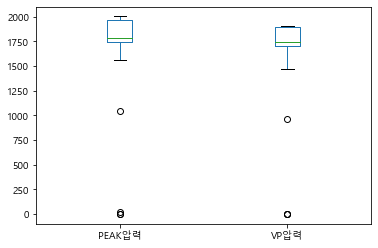

In [25]:
df[['PEAK압력','VP압력']].plot(kind='box')

<AxesSubplot:>

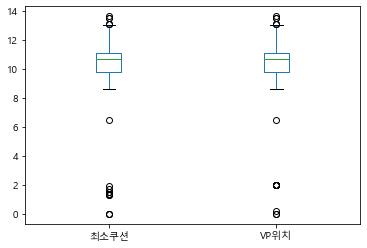

In [27]:
df[['최소쿠션','VP위치']].plot(kind = 'box')

<AxesSubplot:>

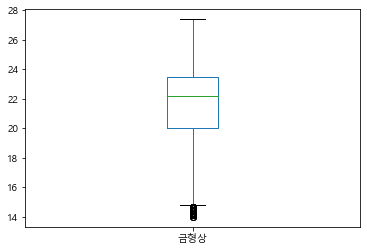

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


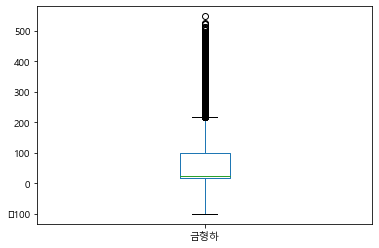

In [31]:
df[['금형상']].plot(kind='box')
df[['금형하']].plot(kind='box')

<AxesSubplot:>

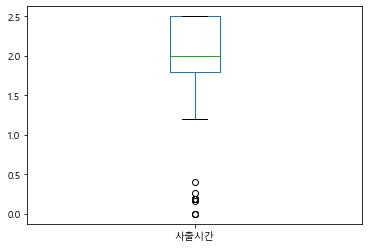

In [33]:
df[['사출시간']].plot(kind='box')

<AxesSubplot:>

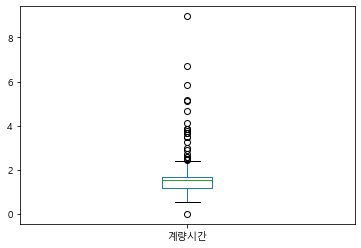

In [34]:
df[['계량시간']].plot(kind='box')

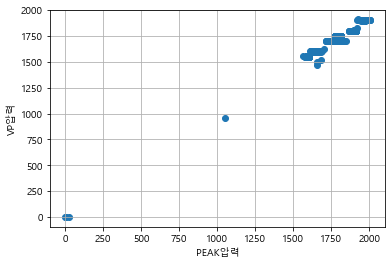

In [11]:
plt.scatter(df['PEAK압력'],df['VP압력'])
plt.xlabel('PEAK압력')
plt.ylabel('VP압력')
plt.grid()
plt.show()

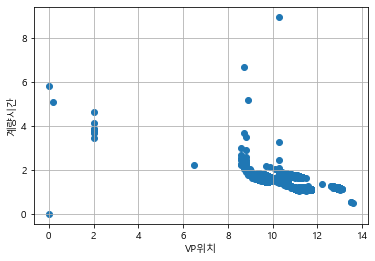

In [12]:
plt.scatter(df['VP위치'],df['계량시간'])
plt.xlabel('VP위치')
plt.ylabel('계량시간')
plt.grid()
plt.show()

In [80]:
#유클리디안거리 sqrt(sum(X-X')^2)
#마할라노비스거리 sqrt((x-m).T * C^-1 * (x-m))

#마할라노비스거리
#cov1 = np.cov(df['PEAK압력'],df['VP압력'])[0,1]
#cov2 = np.cov(df['VP위치'],df['계량시간'])[0,1]
#print(cov1,',',cov2)
cov1 = np.cov(df['PEAK압력'],df['VP압력'],rowvar=False)
cov2 = np.cov(df['VP위치'],df['계량시간'],rowvar=False)
print(cov1,'\n',cov2)

[[15320.28780968 13655.08367462]
 [13655.08367462 12366.18371244]] 
 [[ 0.59446027 -0.13985304]
 [-0.13985304  0.06013371]]


In [82]:
#공분산행렬 -1제곱
cov1_pm1 = np.linalg.matrix_power(cov1,-1)
cov2_pm2 = np.linalg.matrix_power(cov2,-1)
#center point(데이터의 평균, 중간 값)
cp1 = np.mean(df[['PEAK압력','VP압력']], axis=0)
print(cp1)

PEAK압력    1808.437766
VP압력      1750.165611
dtype: float64


In [83]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

df = df[['PEAK압력','VP압력']]
df = df.dropna()
df = df.to_numpy()

distances = []
# for문으로 각 데이터 거리 계산
for i, val in enumerate(df):
    p1 = val
    p2 = cp1
    distance = (p1-p2).T.dot(cov1_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Cutoff(threshold) Chi-Square Distribution for detectiong outliers
cutoff = chi2.ppf(0.95, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff) #cutoff거리보다 먼 거리는 이상치라고 판단하고 이상치의 인덱스번호를 저장

print('index outliers')
print(outlierIndexes)

print('이상치 관측값')
print(df[distances > cutoff,:])

index outliers
(array([     0,      1,   5738, ..., 115790, 115791, 115793], dtype=int64),)
이상치 관측값
[[   0.     0. ]
 [1939.  1899.9]
 [1924.2 1900.7]
 ...
 [1683.  1599.1]
 [1680.1 1599.6]
 [1677.3 1599.4]]


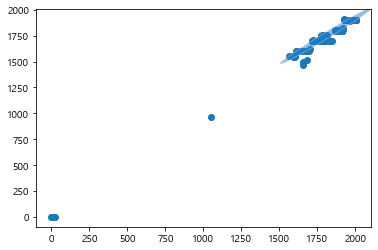

In [51]:
pearson = cov1[0, 1]/np.sqrt(cov1[0, 0] * cov1[1, 1]) #피어슨 상관계수
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(cov1)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(cp1[0], cp1[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

In [64]:
data_df = pd.DataFrame(df)
outlier_idx = pd.DataFrame(outlierIndexes)
data_df
#print(outlier_idx)
data_df.drop(outlier_idx, axis=0, inplace = True)
print(data_df)

             0       1
9295    1986.8  1900.1
9296    1987.3  1899.8
9297    1985.7  1900.4
9298    1987.3  1900.1
9299    1983.8  1900.1
...        ...     ...
119890  1646.6  1600.7
119891  1646.0  1599.3
119892  1644.2  1598.8
119893  1643.0  1599.6
119894  1645.2  1599.8

[110600 rows x 2 columns]


In [74]:
data_df

,0,1
9295,1986.8,1900.1
9296,1987.3,1899.8
9297,1985.7,1900.4
9298,1987.3,1900.1
9299,1983.8,1900.1
...,...,...
119890,1646.6,1600.7
119891,1646.0,1599.3
119892,1644.2,1598.8
119893,1643.0,1599.6
